In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cust-segmentation/Cust_Segmentation - Cust_Segmentation.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/kaggle/input/cust-segmentation/Cust_Segmentation - Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
from sklearn.preprocessing import StandardScaler


In [5]:
x=StandardScaler().fit_transform(df[['Income', 'DebtIncomeRatio', 'Age']])
print(x)

[[-0.71845859 -0.57652509  0.74291541]
 [ 1.38432469  0.39138677  1.48949049]
 [ 0.26803233  1.59755385 -0.25251804]
 ...
 [-0.74441888  3.45892281 -1.24795149]
 [-0.484816   -1.08281745 -0.37694723]
 [ 0.44975434 -0.2340332   2.1116364 ]]


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(x)

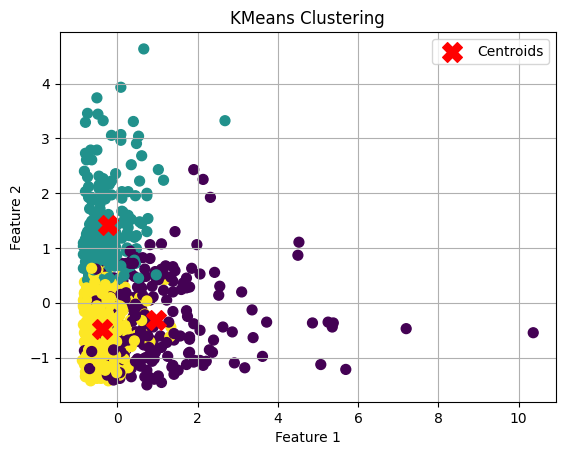

In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis', s=50)

# Plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

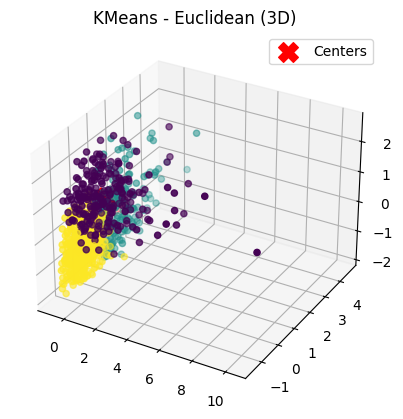

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=kmeans.labels_, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           c='red', s=200, marker='X', label='Centers')
ax.set_title("KMeans - Euclidean (3D)")
plt.legend()
plt.show()

In [9]:
pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


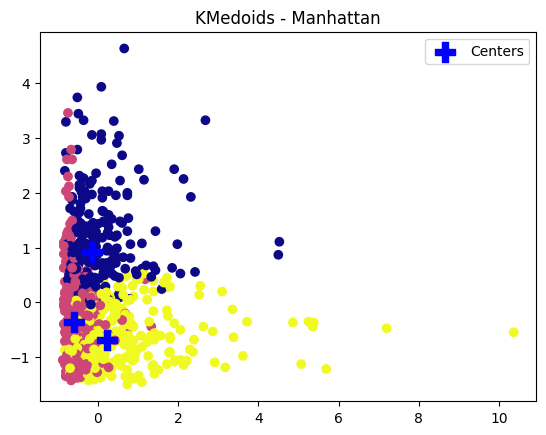

In [10]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3, metric='manhattan', random_state=42).fit(x)
plt.scatter(x[:, 0], x[:, 1], c=kmedoids.labels_, cmap='plasma')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], 
            c='blue', marker='P', s=200, label='Centers')
plt.title("KMedoids - Manhattan")
plt.legend()
plt.show()

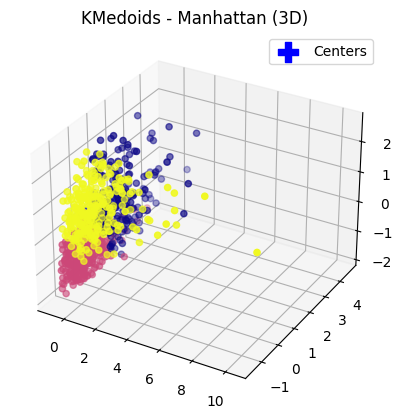

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=kmedoids.labels_, cmap='plasma')
ax.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], kmedoids.cluster_centers_[:, 2],
           c='blue', s=200, marker='P', label='Centers')
ax.set_title("KMedoids - Manhattan (3D)")
plt.legend()
plt.show()